Бобровская Наталия, 491 группа, Задание 1

$\textbf{1 Метод k ближайших соседей}$

10% баллов за задание, оценочное время выполнения: 20 минут

Сгенерируйте обучающую выборку из описанных двумя признаками объектов нескольких классов и визуализируйте разделяющие поверхности, получаемые при решении задачи классификации методом k ближайших соседей для разных k. Попробуйте подобрать оптимальное значение количества соседей k с помощью 5-fold cross-validation, построив график зависимости accuracy в кросс-валидации от k.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cross_validation, datasets, metrics, neighbors 
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap

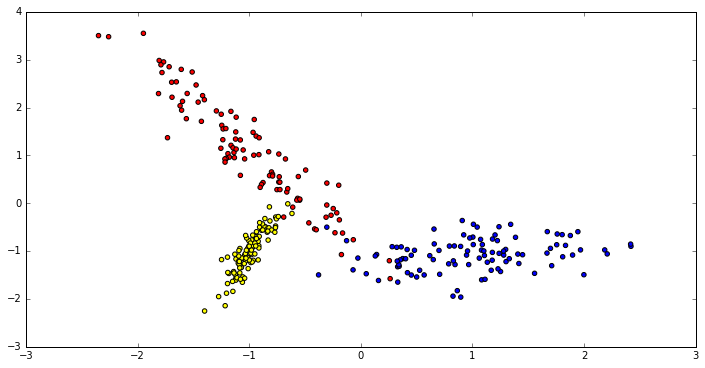

In [26]:
#Сгенерируйте обучающую выборку из описанных двумя признаками объектов нескольких классов

sample = datasets.make_classification(n_samples = 300, n_features = 2, n_informative = 2, 
                                                      n_classes = 3, n_redundant = 0, 
                                                      n_clusters_per_class = 1)

colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

plt.figure(figsize=(12,6))
plt.scatter(map(lambda x: x[0], sample[0]), map(lambda x: x[1], sample[0]), 
              c = sample[1], cmap = colors)

In [27]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(sample[0], sample[1], 
                                                                                     test_size = 0.3, random_state = 1)

In [28]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [41]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, i,
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    plt.figure(figsize = (12, 6))
    
    #plot decision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    plt.title('Train data, accuracy={:.2f}, number of neighbors = {}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data)), i))
    
    #plot decision surface on the test data
    plt.subplot(1,2,2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    plt.title('Test data, accuracy={:.2f}, number of neighbors = {}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data)), i))

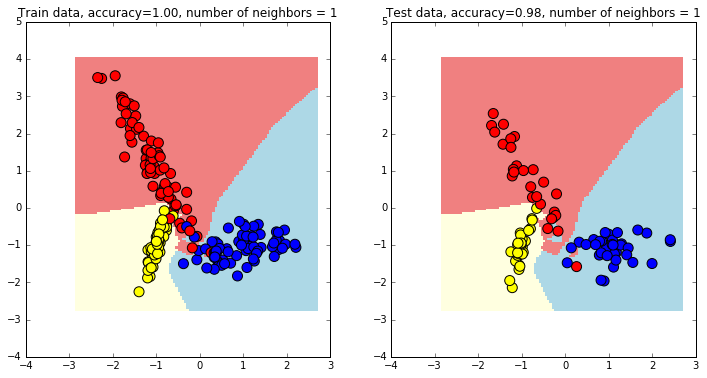

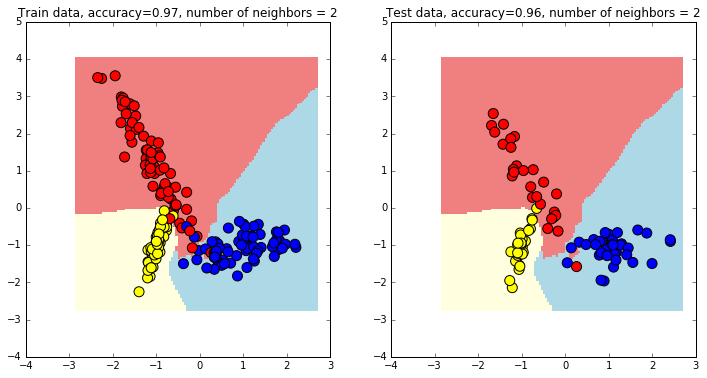

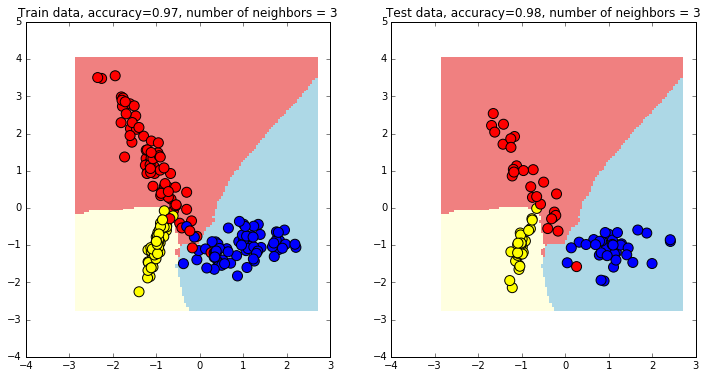

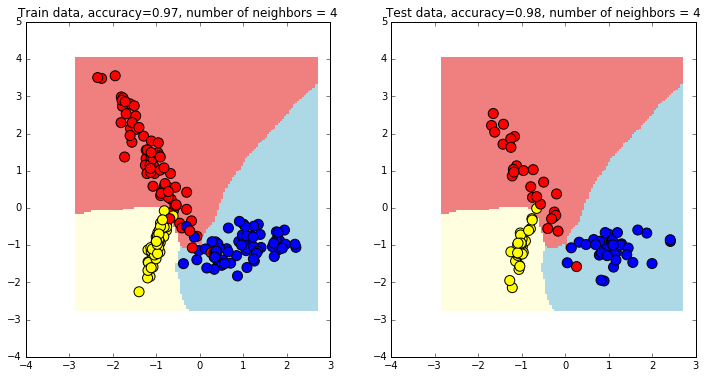

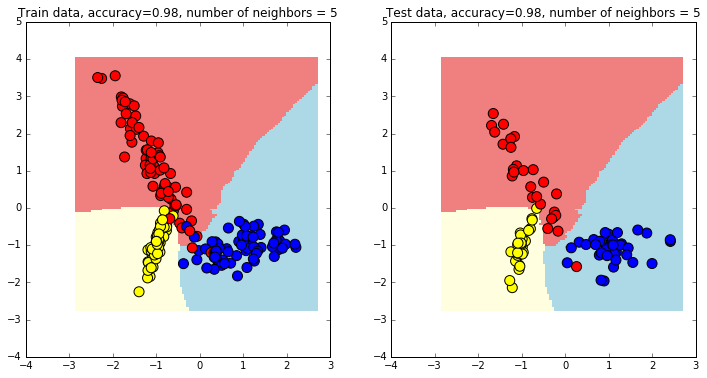

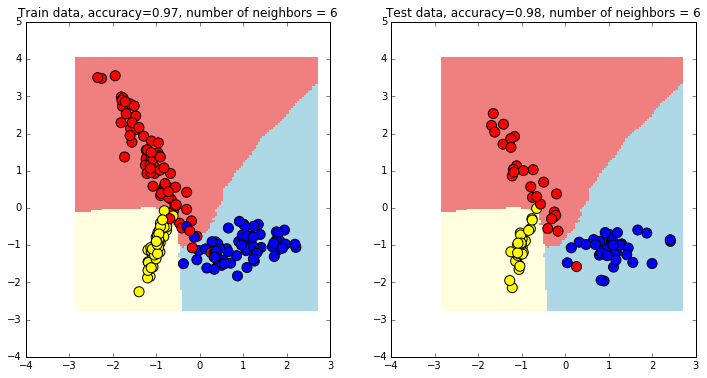

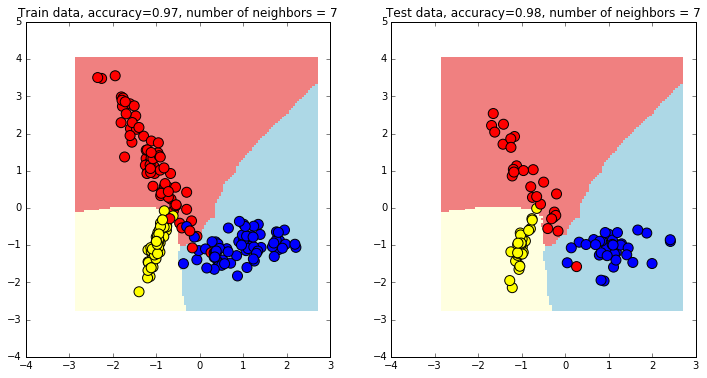

In [42]:
#визуализируйте разделяющие поверхности, получаемые при решении задачи классификации методом k ближайших соседей для разных k
#KNeighborsClassifier
N = 7
for i in range(N + 1)[1:]:
    estimator = neighbors.KNeighborsClassifier(n_neighbors=i)
    plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, i)

Max accuracy 0.976440677966
Number of neighbors with max accuracy 4


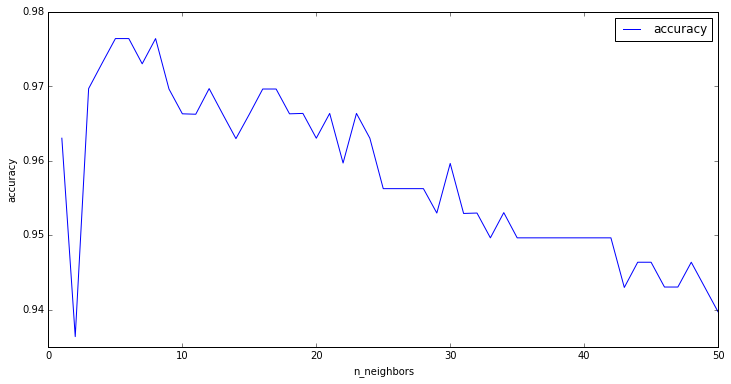

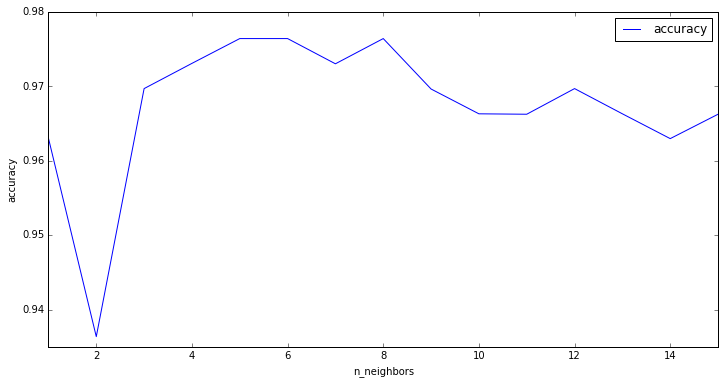

In [46]:
#Попробуйте подобрать оптимальное значение количества соседей k с помощью 5-fold cross-validation, 
#построив график зависимости accuracy в кросс-валидации от k.
N = 50

accuracy = np.zeros(N)
for i in range (N + 1)[1:]:
    estimator = neighbors.KNeighborsClassifier(n_neighbors = i)
    accuracy[i - 1] = np.mean(cross_val_score(estimator, sample[0], sample[1], cv = 5))

#print accuracy
print 'Max accuracy', np.max(accuracy)
print 'Number of neighbors with max accuracy', np.argmax(accuracy)

plt.figure(figsize=(12, 6))
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.plot(np.arange(N+1)[1:], accuracy, label = "accuracy")
plt.legend(loc = 'best')
   
plt.figure(figsize=(12, 6))
plt.xlabel("n_neighbors")
plt.xlim((1,15))
plt.ylabel("accuracy")
plt.plot(np.arange(N+1)[1:], accuracy, label = "accuracy")
plt.legend(loc = 'best')

Оптимальное значение количества соседей k = 3-10 (варьируется при разных выборках)